In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#The data is available as two attached CSV files:

#takehome_user_engagement.csv
#takehome_users.csv

# The data has the following two tables:

# 1. User table

#A user table ("takehome_users")with data on 12,000 users who signed up for the product in the last two years.   

This  table  includes:
        
    ● name:the user's name
    
    ● object_id:the  user's  id
    
    ● email:email address
    
    ● creation_source:how their account was created. This takes on one of  5 values:
    
    ○ PERSONAL_PROJECTS:invited  to join another user's personal  workspace
    
    ○ GUEST_INVITE:invited to an organization as a guest(limited  permissions)
    
    ○ ORG_INVITE:invited to an organization(as a full member)
    
    ○ SIGNUP:signed up via the website
    
    ○ SIGNUP_GOOGLE_AUTH:signed up using Google Authentication(using a Google email account for their login id)
    
    ● creation_time:when they created their account
    
    ● last_session_creation_time:unix timestamp of last login
    
    ● opted_in_to_mailing_list:whether they have opted into receiving marketing  emails
    
    ● enabled_for_marketing_drip:whether they are on the regular marketing email drip
    
    ● org_id:the organization(group of users)they belong to
    
    ● invited_by_user_id:which user invited them  to join(if  applicable)


In [23]:
x=pd.read_csv("takehome_user_engagement.csv",encoding='ISO-8859-1')
takehome_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [24]:
takehome_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


# 2.Usage summary table

In [5]:
#( "takehome_user_engagement" ) that has a row for each day that a user logged into the product.

In [25]:
y=pd.read_csv("takehome_users.csv",encoding='ISO-8859-1')
takehome_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [26]:
takehome_user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [28]:
df_user_eng=pd.DataFrame(x)
df_user=pd.DataFrame(y)
df_user = df_user.fillna(0)
df_user1 = df_user_eng.fillna(0)

                    enabled_for_marketing_drip  name  opted_in_to_mailing_list
creation_source                                                               
GUEST_INVITE                               319  2163                       541
ORG_INVITE                                 644  4254                      1078
PERSONAL_PROJECTS                          303  2111                       512
SIGNUP                                     319  2087                       525
SIGNUP_GOOGLE_AUTH                         207  1385                       338


Text(0.5, 1.0, 'creation_source comparation')

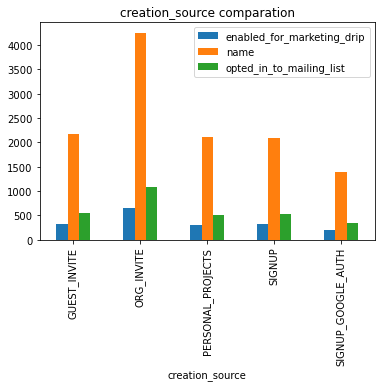

In [31]:
df_p1=pd.pivot_table(df_user,index='creation_source',values=['name','opted_in_to_mailing_list','enabled_for_marketing_drip'],aggfunc={'name':'count','opted_in_to_mailing_list' :np.sum,'enabled_for_marketing_drip':np.sum})
print(df_p1)
df_p1.plot(kind='bar')
plt.title("creation_source comparation")

In [32]:
#what is creation sourse ratio?

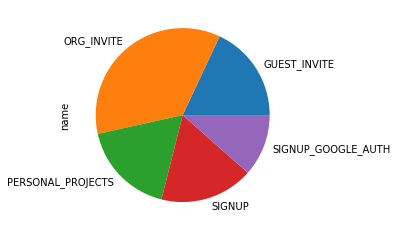

In [33]:
pie=df_p1["name"].plot(kind='pie')

Text(0.5, 1.0, 'creation_source comparation ratio')

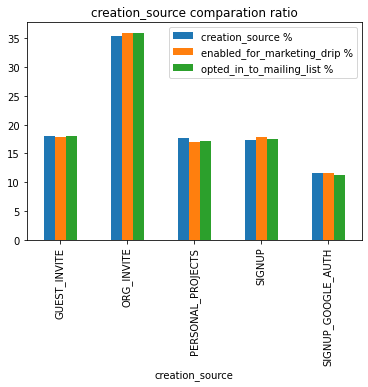

In [35]:
df_p1['creation_source %'] = (df_p1.name / df_p1.name.sum() * 100)
df_p1['enabled_for_marketing_drip %'] = (df_p1.enabled_for_marketing_drip / df_p1.enabled_for_marketing_drip.sum() * 100)
df_p1['opted_in_to_mailing_list %'] = (df_p1.opted_in_to_mailing_list / df_p1.opted_in_to_mailing_list.sum() * 100)
x=(df_p1[["creation_source %","enabled_for_marketing_drip %","opted_in_to_mailing_list %"]])
x.plot(kind='bar')
plt.title("creation_source comparation ratio")

In [36]:
#what is creation sourse ratio?

We see in numbers & in ratio comparation of creation source & people who opted for mail &
markating are high in point of "Organation invites"

# what organization has the most users?

In [41]:
df_user.org_id.value_counts().head(5)

0    319
1    233
2    201
3    168
4    159
Name: org_id, dtype: int64